In [4]:
from point_impl import Point

In [5]:
def gen_id(x, y):
    return (x + y) * (x + y + 1) // 2 + y

In [350]:
class Node:
    def __init__(self, value, data=''):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1
        self.data = data

class AVLTree:
    '''AVLTree container is tree-type data structure with best time-complexity'''
    # maybe work
    def __init__(self, *data):
        self.index = 0
        self.root_id = 0
        self.nodes = [None]
        if data != None:
            for el in data:
                self.insert(el)

    # maybe work
    def traverse(self, node, save):
        if node == None or self.nodes[node] == None: return
        save.append((self.nodes[node].value, self.nodes[node].data))
        self.traverse(self.nodes[node].left, save)
        self.traverse(self.nodes[node].right, save)

    # maybe work
    def __repr__(self):
        l = []
        self.traverse(self.root_id, l)
        return ''.join(str(l))

    # maybe work
    def __str__(self):
        l = []
        self.traverse(self.root_id, l)
        return f'Class SecondContainer with {len(self)} nodes.'

    # maybe work
    def height(self, node):
        if not node or not self.nodes[node]:
            return 0
        return self.nodes[node].height

    # maybe work
    def balance(self, node):
        if node == None or self.nodes[node] == None:
            return 0
        return self.height(self.nodes[node].left) - self.height(self.nodes[node].right)

    # maybe work
    def insert_value(self, root, value, data):
        if not root or not self.nodes[root]:
            ret_index = len(self.nodes)
            self.nodes.append(Node(value, data))
            return ret_index
        elif value < self.nodes[root].value:
            self.nodes[root].left = self.insert_value(self.nodes[root].left, value, data)
        else:
            self.nodes[root].right = self.insert_value(self.nodes[root].right, value, data)

        self.nodes[root].height = 1 + max(self.height(self.nodes[root].left), self.height(self.nodes[root].right))
        balance = self.balance(root)

        # Left rotation
        if balance > 1 and value < self.nodes[self.nodes[root].left].value:
            return self.right_rotate(root)

        # Right rotation
        if balance < -1 and value > self.nodes[self.nodes[root].right].value:
            return self.left_rotate(root)

        # Left-Right rotation
        if balance > 1 and value > self.nodes[self.nodes[root].left].value:
            self.nodes[root].left = self.left_rotate(self.nodes[root].left)
            return self.right_rotate(root)

        # Right-Left rotation
        if balance < -1 and value < self.nodes[self.nodes[root].right].value:
            self.nodes[root].right = self.right_rotate(self.nodes[root].right)
            return self.left_rotate(root)

        return root

    def delete(self, root, value):
        if root == None or self.nodes[root] == None:
            return root

        if value < self.nodes[root].value:
            self.nodes[root].left = self.delete(self.nodes[root].left, value)
        elif value > self.nodes[root].value:
            self.nodes[root].right = self.delete(self.nodes[root].right, value)
        else:
            if self.nodes[root].left == None or self.nodes[self.nodes[root].left] == None:
                temp = self.nodes[root].right
                self.nodes[root] = None
                return temp
            elif self.nodes[root].right == None or self.nodes[self.nodes[root].right] == None:
                temp = self.nodes[root].left
                self.nodes[root] = None
                return temp

            temp = self.min_value_node(self.nodes[root].right)
            self.nodes[root].value = self.nodes[temp].value
            self.nodes[root].data = self.nodes[temp].data
            self.nodes[root].right = self.delete(self.nodes[root].right, self.nodes[temp].value)

        if root == None or self.nodes[root] == None:
            return root

        self.nodes[root].height = 1 + max(self.height(self.nodes[root].left), self.height(self.nodes[root].right))
        balance = self.balance(root)

        # Left rotation
        if balance > 1 and self.balance(self.nodes[root].left) >= 0:
            return self.right_rotate(root)

        # Right rotation
        if balance < -1 and self.balance(self.nodes[root].right) <= 0:
            return self.left_rotate(root)

        # Left-Right rotation
        if balance > 1 and self.balance(self.nodes[root].left) < 0:
            self.nodes[root].left = self.left_rotate(self.nodes[root].left)
            return self.right_rotate(root)

        # Right-Left rotation
        if balance < -1 and self.balance(self.nodes[root].right) > 0:
            self.nodes[root].right = self.right_rotate(self.nodes[root].right)
            return self.left_rotate(root)

        return root

    # myabe work
    def left_rotate(self, z):
        y = self.nodes[z].right
        T2 = self.nodes[y].left

        self.nodes[y].left = z
        self.nodes[z].right = T2

        self.nodes[z].height = 1 + max(self.height(self.nodes[z].left), self.height(self.nodes[z].right))
        self.nodes[y].height = 1 + max(self.height(self.nodes[y].left), self.height(self.nodes[y].right))

        return y

    # myabe work
    def right_rotate(self, z):
        y = self.nodes[z].left
        T3 = self.nodes[y].right

        self.nodes[y].right = z
        self.nodes[z].left = T3

        self.nodes[z].height = 1 + max(self.height(self.nodes[z].left), self.height(self.nodes[z].right))
        self.nodes[y].height = 1 + max(self.height(self.nodes[y].left), self.height(self.nodes[y].right))

        return y

    # myabe work [!!]
    def min_value_node(self, root):
        current = root
        while self.nodes[current].left:
            current = self.nodes[current].left
        return current

    # maybe work
    def find_value(self, root, value):
        if root == None or self.nodes[root] == None:
            return len(self.nodes)
        if self.nodes[root].value == value:
            return root
        if self.nodes[root].value < value:
            return self.find_value(self.nodes[root].right, value)
        return self.find_value(self.nodes[root].left, value)

    # myabe work
    def insert_el(self, value, data=''):
        self.root_id = self.insert_value(self.root_id, value, data)

    # myabe work
    def insert(self, els):
        if not isinstance(els, list):
            self.insert_el(gen_id(els.x, els.y), els)
            return
        for i in els:
            self.insert_el(gen_id(i.x, i.y), i)
    
    def delete_value(self, value):
        self.root_id = self.delete(self.root_id, value)

    # maybe work
    def find(self, el):
        if isinstance(el, Point):
            return self.find_value(self.root_id, gen_id(el.x, el.y))
        else:
            return self.find_value(self.root_id, el)

    # maybe work
    def __contains__(self, item):
        return True if self.find(gen_id(item.x, item.y)) != len(self.nodes) else False

    # maybe work
    def find_length(self, root):
        if root == None or not self.nodes[root]:
            return 0
        return 1 + self.find_length(self.nodes[root].left) + self.find_length(self.nodes[root].right)

    # maybe work
    def __len__(self):
        return self.find_length(self.root_id)

    # maybe work
    def __getitem__(self, unique_id):
        return self.nodes[self.find(unique_id)].data

    # myabe work
    def __setitem__(self, index, value):
        pass

    # myabe work
    def __iter__(self):
        return self

    # myabe work
    def __next__(self):
        if self.index == len(self):
            raise StopIteration
        temp_l = []
        self.traverse(self.root_id, temp_l)
        data_to_ret = temp_l[self.index]
        self.index = self.index + 1
        return data_to_ret
    
    # maybe work
    def __delitem__(self, unique_id):
        self.delete_value(unique_id)

Class tests below:
    - deletion (by index): passed
    - insertion (list of Point instances): passed
    - find (return index of element or len(container) if no element): passed
    - contains (find on steroids): passed
    - len (return number of elements in container): passed
    - str: passed
    - repr (some tech-info): passed
    - getitem (by index): passed
    - iter with next: passed

In [351]:
# Init
tr = AVLTree(Point(100, 120), Point(5, 5), Point(12, 60))

In [352]:
tr

[(2688, classic class representation: x=12 and y=60. wow), (60, classic class representation: x=5 and y=5. wow), (24430, classic class representation: x=100 and y=120. wow)]

In [353]:
# str() and representation
print(str(tr))
tr

Class SecondContainer with 3 nodes.


[(2688, classic class representation: x=12 and y=60. wow), (60, classic class representation: x=5 and y=5. wow), (24430, classic class representation: x=100 and y=120. wow)]

In [354]:
# len
len(tr)

3

In [355]:
# getitem
tr[60], type(tr[60])

(classic class representation: x=5 and y=5. wow, point_impl.Point)

In [356]:
# iterator with next()
tr_it = iter(tr)
if tr_it is not None:
    print(next(tr_it))
    print(next(tr_it))
    print(next(tr_it))

(2688, classic class representation: x=12 and y=60. wow)
(60, classic class representation: x=5 and y=5. wow)
(24430, classic class representation: x=100 and y=120. wow)


In [359]:
# insertion
tr.insert(Point(12, 80))
tr

[(4358, classic class representation: x=12 and y=80. wow), (2688, classic class representation: x=12 and y=60. wow), (60, classic class representation: x=5 and y=5. wow), (24430, classic class representation: x=100 and y=120. wow), (4358, classic class representation: x=12 and y=80. wow), (4358, classic class representation: x=12 and y=80. wow)]

In [362]:
# deletion
del tr[gen_id(12, 80)]
tr

[(2688, classic class representation: x=12 and y=60. wow), (60, classic class representation: x=5 and y=5. wow), (24430, classic class representation: x=100 and y=120. wow)]

In [363]:
tr.nodes[4].data

classic class representation: x=100 and y=120. wow

In [220]:
tr

[(2688, classic class representation: x=12 and y=60. wow), (60, classic class representation: x=5 and y=5. wow), (24430, classic class representation: x=12 and y=80. wow)]

In [364]:
# find and contains
print(f'''
find point in class: {tr.find(Point(12, 60))}
find point not in class: {tr.find(Point(1021, 10))}
len of class nodes list: {len(tr.nodes)}
___________________________
contains (point in class): {Point(12, 60) in tr}
contains (point not in class): {Point(12123, 62012) in tr}
'''.strip())

find point in class: 3
find point not in class: 7
len of class nodes list: 7
___________________________
contains (point in class): True
contains (point not in class): False


In [365]:
import numpy as np

In [366]:
import matplotlib.pyplot as plt

In [367]:
import timeit
import math
import random

In [375]:
plt.rcParams['figure.figsize'] = [10, 6]

def perform_bench(type_of_bench):
    if type_of_bench == 'insert':
        ns = np.linspace(0, 100_000, 100, dtype=int)
        ts = [timeit.timeit('tr.insert([Point({}, {})])'.format(n, n + 1), 
                            setup='tr = AVLTree([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=2000)
          for n in ns]
    elif type_of_bench == 'delete':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('tr.delete_value(gen_id(Point({}, {}).x, Point({}, {}).y))'.format(n - 2, n - 1, n - 2, n - 1), 
                            setup='tr = AVLTree([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'find':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('tr.find(gen_id(0, 1))'.format(''), 
                            setup='tr = AVLTree([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=1000)
          for n in ns]
    elif type_of_bench == 'contains':
        ns = np.linspace(0, 100_000, 10, dtype=int)
        ts = [timeit.timeit('Point(0, 1) in tr'.format(''), 
                            setup='tr = AVLTree([Point(i, i + 1) for i in range({})])'.format(n),
                            globals=globals(),
                            number=2000)
          for n in ns]
    
    plt.plot(ns, ts, 'or')
    
    degree = 4
    coeffs = np.polyfit(ns, ts, degree)
    p = np.poly1d(coeffs)
    plt.plot(ns, [p(n) for n in ns], '-b')

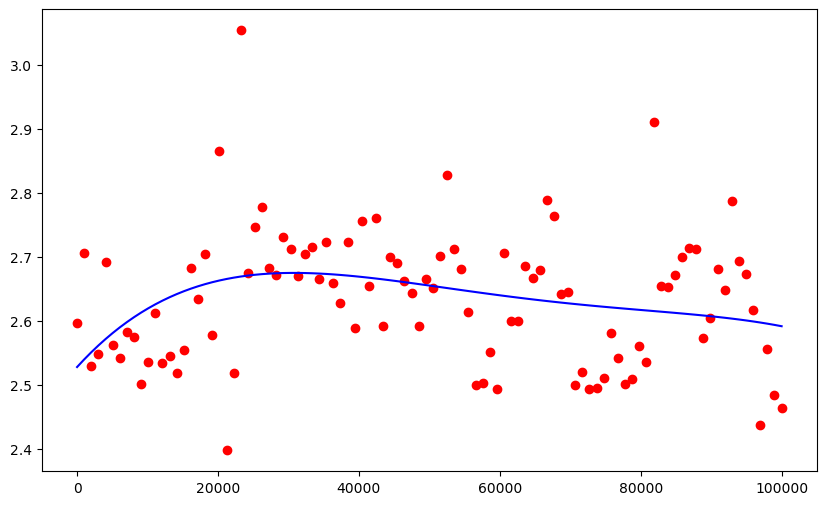

In [63]:
perform_bench('insert')

In [1]:
perform_bench('find')

NameError: name 'perform_bench' is not defined

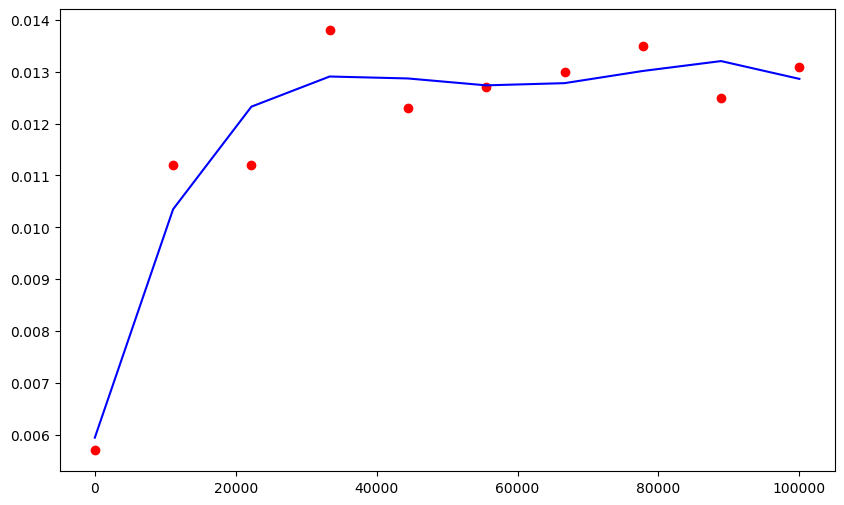

In [376]:
perform_bench('contains')

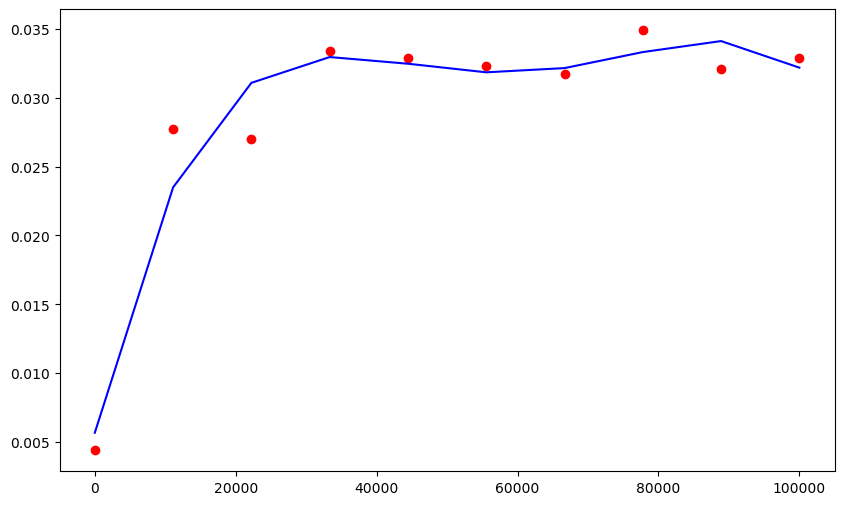

In [371]:
perform_bench('delete')